In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("supermarket.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Let's look through our dataset: <br>
Attribute information<br>
Invoice id: Computer generated sales slip invoice identification number<br><br>
Branch: Branch of supercenter (3 branches are available identified by A, B and C).<br><br>
City: Location of supercenters<br><br>
Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.<br><br>
Gender: Gender type of customer<br><br>
Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel<br><br>
Unit price: Price of each product in dollar <br><br>
Quantity: Number of products purchased by customer<br><br>
Tax: 5% tax fee for customer buying<br><br>
Total: Total price including tax<br><br>
Date: Date of purchase (Record available from January 2019 to March 2019)<br><br>
Time: Purchase time (10am to 9pm)<br><br>
Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)<br><br>
COGS: Cost of goods sold<br><br>
Gross margin percentage: Gross margin percentage<br><br>
Gross income: Gross income<br><br>
Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)<br><br>

Check Null values:

In [3]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Check schema

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

After checking the schema, there are some problems from the schema. <br>
- Date and time should be convert from object into DateTime datatype

In [8]:
pd.to_datetime(df["Date"])

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

Let's add a hour and minute column

In [17]:
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour
df["Minute"] = pd.to_datetime(df["Time"]).dt.minute
df = df.drop(columns=["Time"])
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,4.761905,26.1415,9.1,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,4.761905,3.8200,9.6,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,4.761905,16.2155,7.4,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,4.761905,23.2880,8.4,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,4.761905,30.2085,5.3,10,37


Let's see the customers often come to the supermarket at which hour: 

In [25]:
np.sort(df["Hour"].unique())

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype=int64)

Let's see the distribution to see when do people come to the supermarket most: 

[]

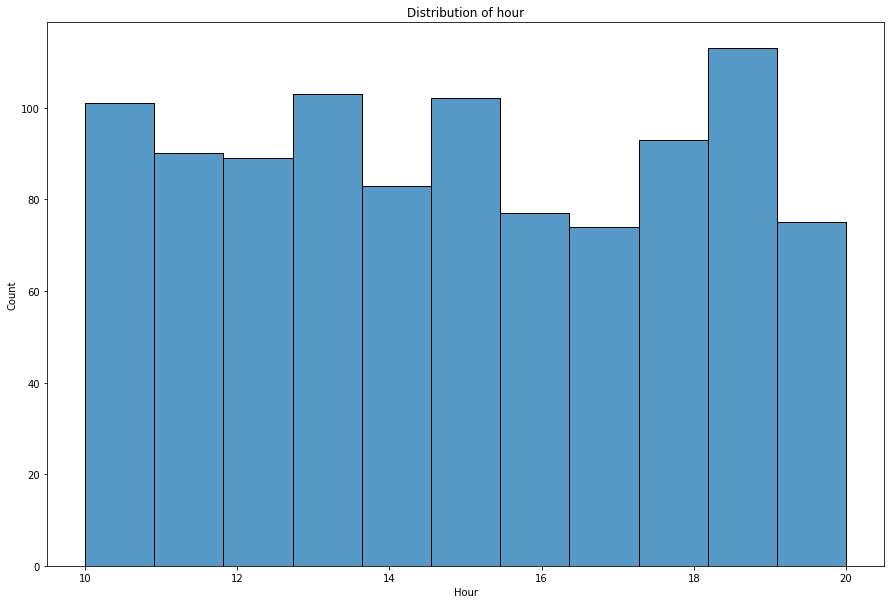

In [27]:
plt.figure(figsize=(15,10))
plt.title("Distribution of hour")
sns.histplot(df["Hour"])
plt.plot()

18 to 19pm is the range of time that most customers visit

Let's also see a little bit about City, Gender, Customer type, Payment, Product Line

- City: Let's see how many branch this supermarket have, and which one is the most crowded

In [28]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

[]

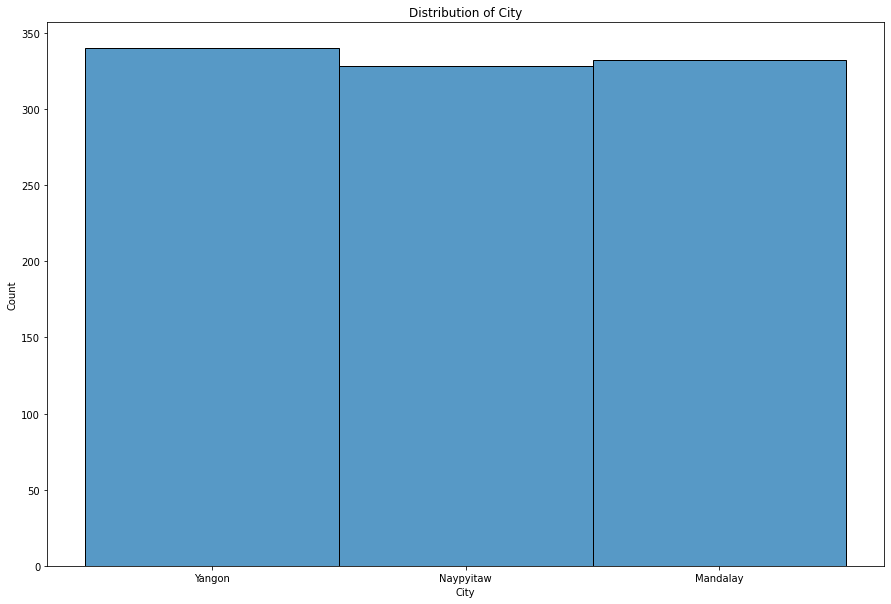

In [29]:
plt.figure(figsize=(15,10))
plt.title("Distribution of City")
sns.histplot(df["City"])
plt.plot()

People go to each store equally

- Gender: Let's see do men go to the supermarket more often than women

[]

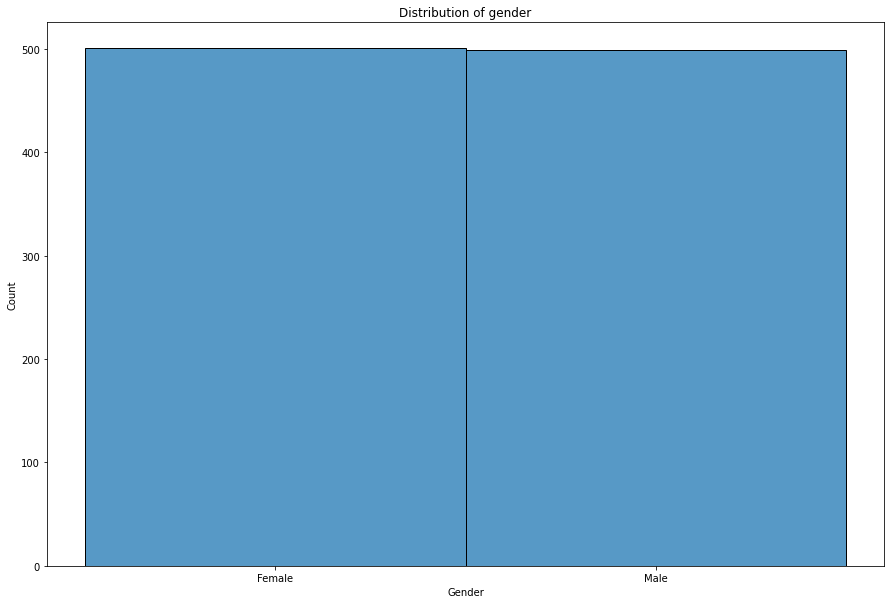

In [30]:
plt.figure(figsize=(15,10))
plt.title("Distribution of gender")
sns.histplot(df["Gender"])
plt.plot()

Men and women are equally visit the supermarket

- Customer type: Let's see how many of customer type are there, and how many of customer achieve that type

In [32]:
df["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

[]

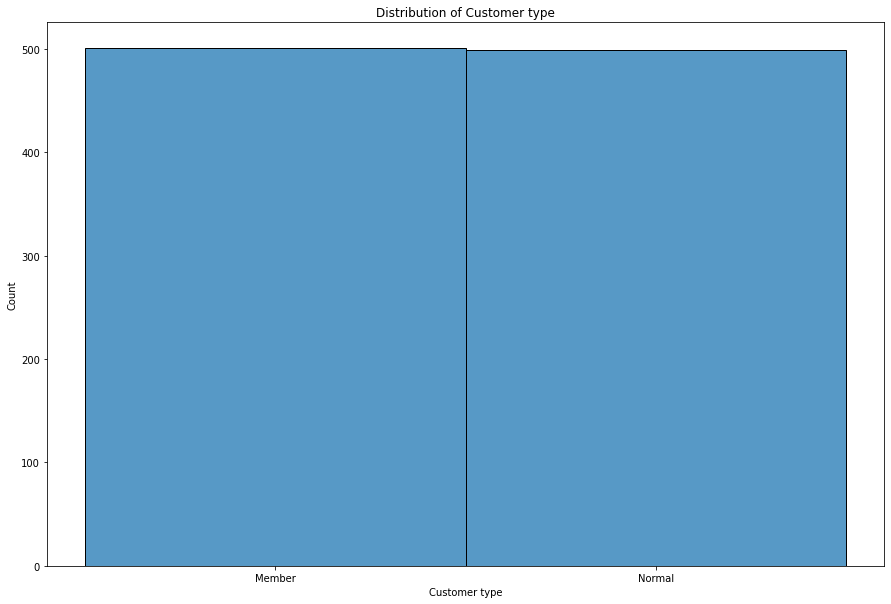

In [33]:
plt.figure(figsize=(15,10))
plt.title("Distribution of Customer type")
sns.histplot(df["Customer type"])
plt.plot()

The number of member and normal customer are the same

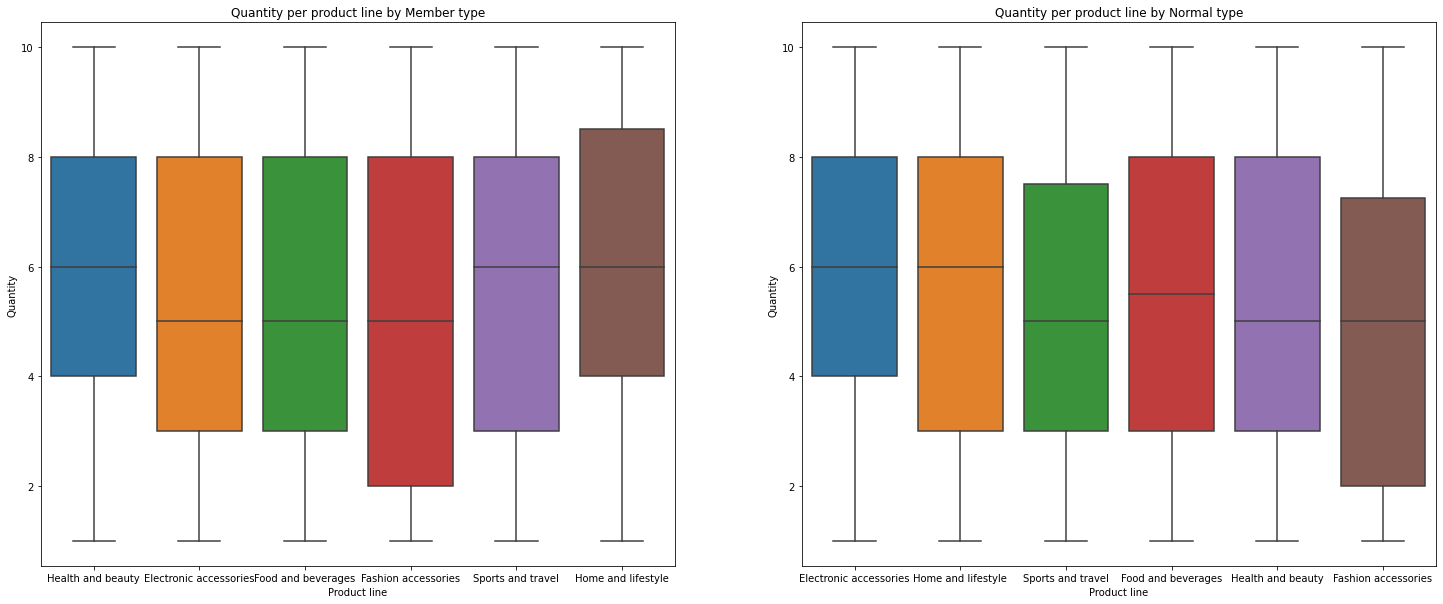

In [56]:
plt.figure(figsize=(25,10))
for i,x in enumerate(df["Customer type"].unique(),1):
    plt.subplot(1,2,i)
    plt.title("Quantity per product line by {0} type".format(x))
    sns.boxplot(data=df[df["Customer type"] == x], x="Product line", y="Quantity")
    plt.plot()

We can see that Home and Lifestyle product are the most favorite products for member customer while this type of product are the most unbuy product by the normal type member. The average quantity of all type of product line are mostly the same (from 5 to 6) for both 2 member types. 

- Payment: Let's see how many of payment type are there and which one is there favorite :

In [34]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

[]

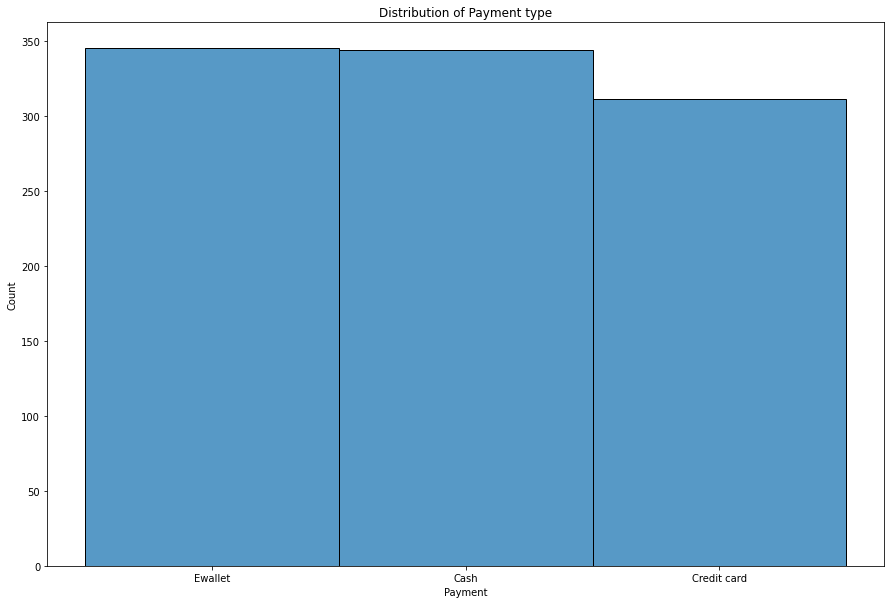

In [35]:
plt.figure(figsize=(15,10))
plt.title("Distribution of Payment type")
sns.histplot(df["Payment"])
plt.plot()

There are 3 type of payment methods: Ewallet, Cash and Credit card. 

[]

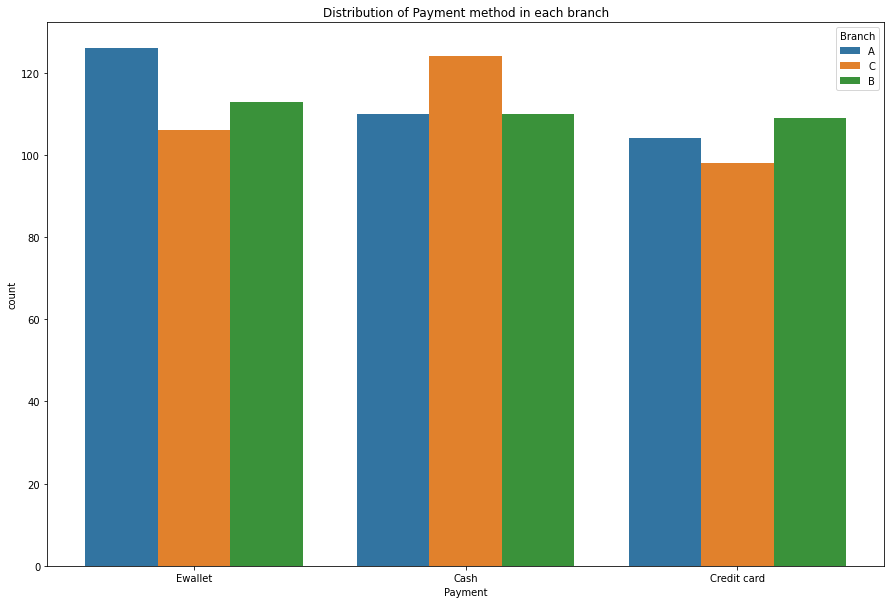

In [57]:
plt.figure(figsize=(15,10))
plt.title("Distribution of Payment method in each branch")
sns.countplot(data=df, x="Payment", hue="Branch")
plt.plot()

Ewallet are more favorable in branch A while in branch C, cash payment is the most favorable. 

In [59]:
df.groupby(["Customer type"]).agg({"Total":"sum"})

,Total
Customer type,
Member,164223.444
Normal,158743.305


[]

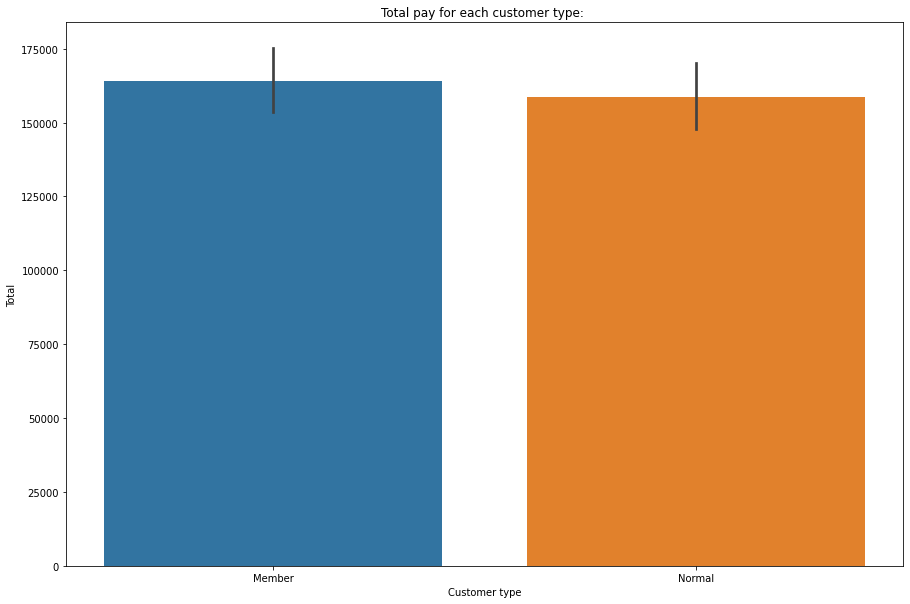

In [62]:
plt.figure(figsize=(15,10))
plt.title("Total pay for each customer type: ")
sns.barplot(data=df, x="Customer type", y="Total", estimator="sum")
plt.plot()

Member type are slightly pay more that normal type. 

- Product line: Let's see how many type of product does this supermarket sold, and which one is the best seller: 

In [36]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

[]

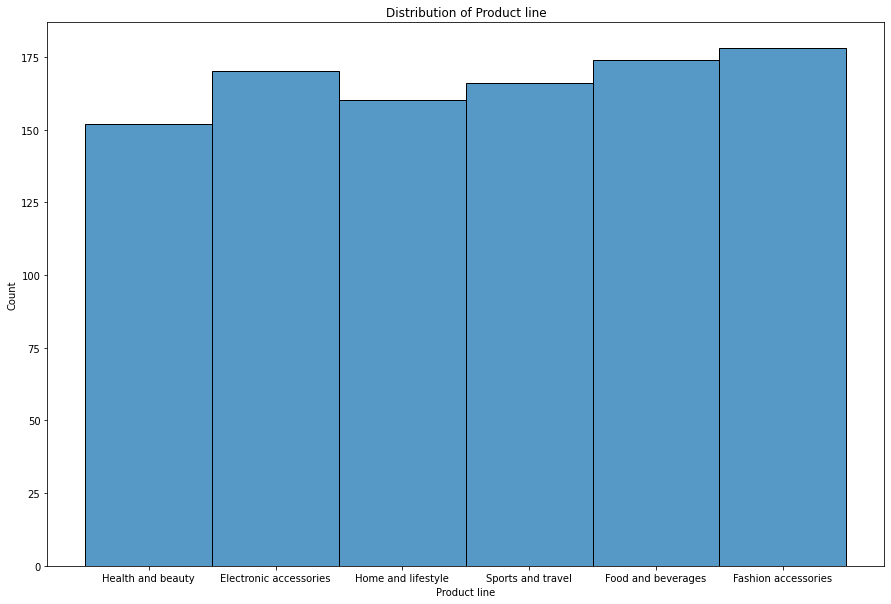

In [37]:
plt.figure(figsize=(15,10))
plt.title("Distribution of Product line")
sns.histplot(df["Product line"])
plt.plot()

[]

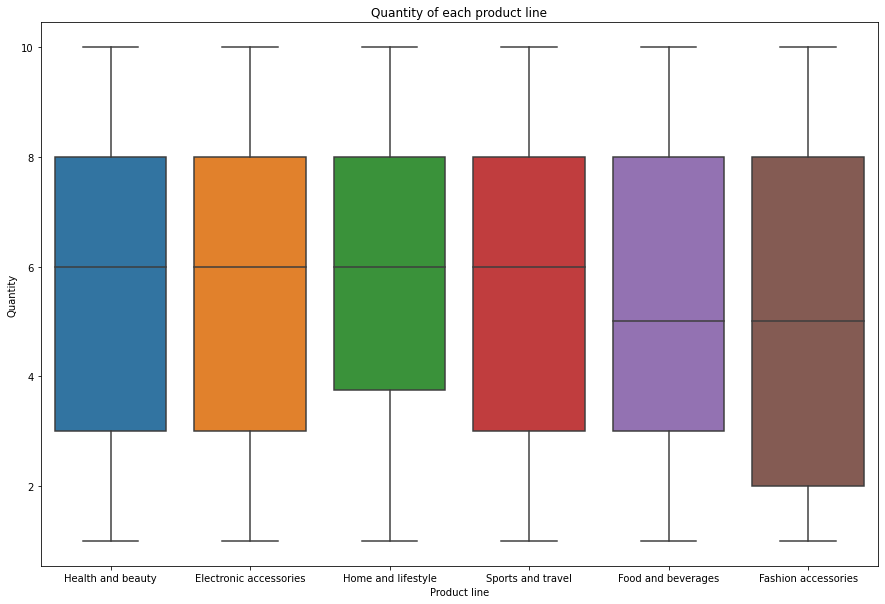

In [41]:
plt.figure(figsize=(15,10))
plt.title("Quantity of each product line")
sns.boxplot(data=df, x="Product line", y="Quantity")
plt.plot()

[]

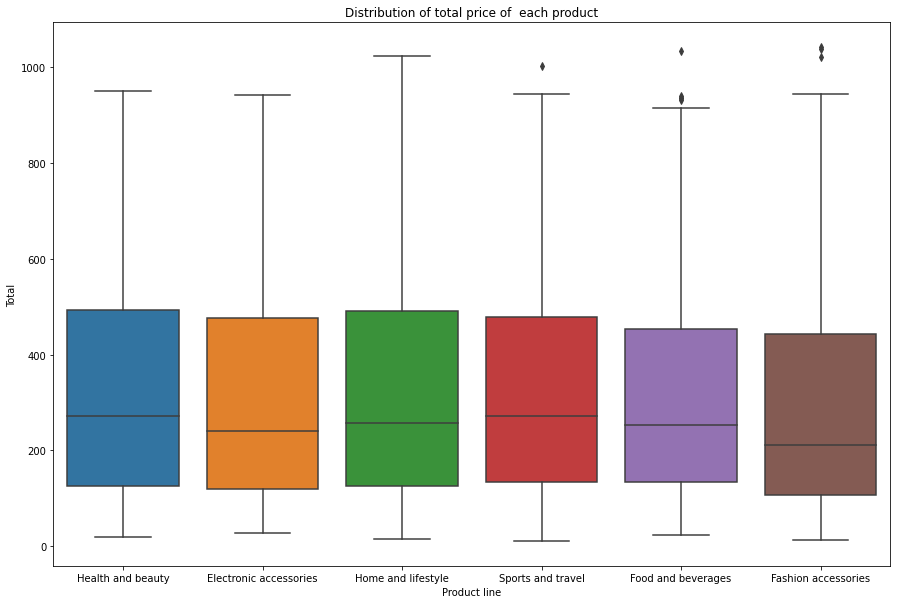

In [43]:
plt.figure(figsize=(15,10))
plt.title("Distribution of total price of  each product")
sns.boxplot(data=df, x="Product line", y="Total")
plt.plot()

It is quite surprise that all 6 product line are equal in total income. 

Let's move to Rating. 

[]

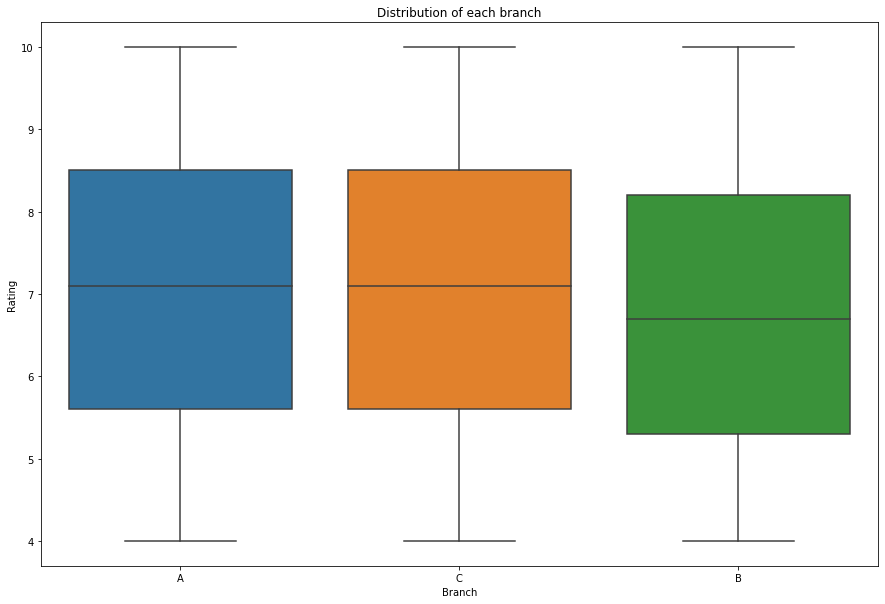

In [39]:
plt.figure(figsize=(15,10))
plt.title("Distribution of each branch")
sns.boxplot(data=df, y="Rating", x="Branch")
plt.plot()

[]

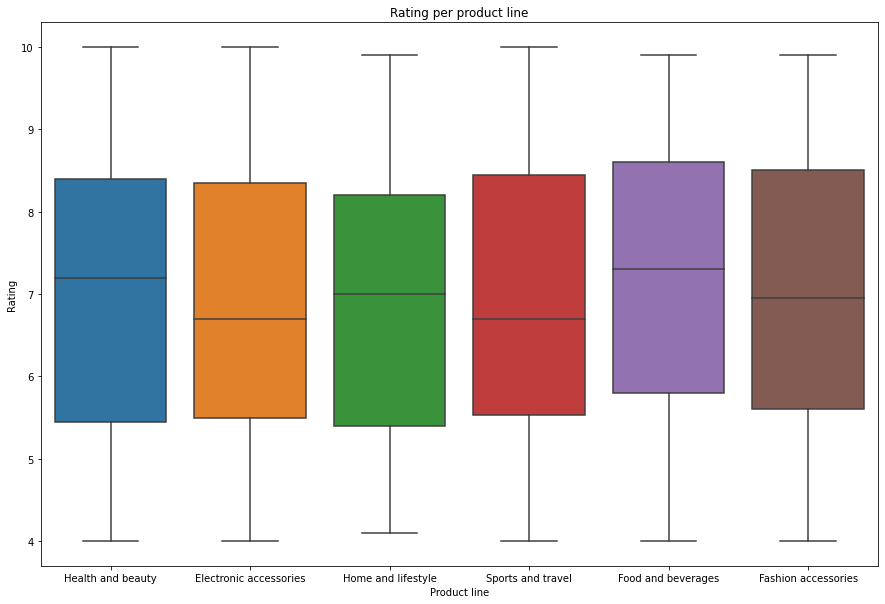

In [44]:
plt.figure(figsize=(15,10))
plt.title("Rating per product line")
sns.boxplot(data=df, x="Product line", y="Rating")
plt.plot()

Food and beverage have the best rating in all 6 product line. 

Let's see in which time that the supermarket sell the most quantity of product: 

[]

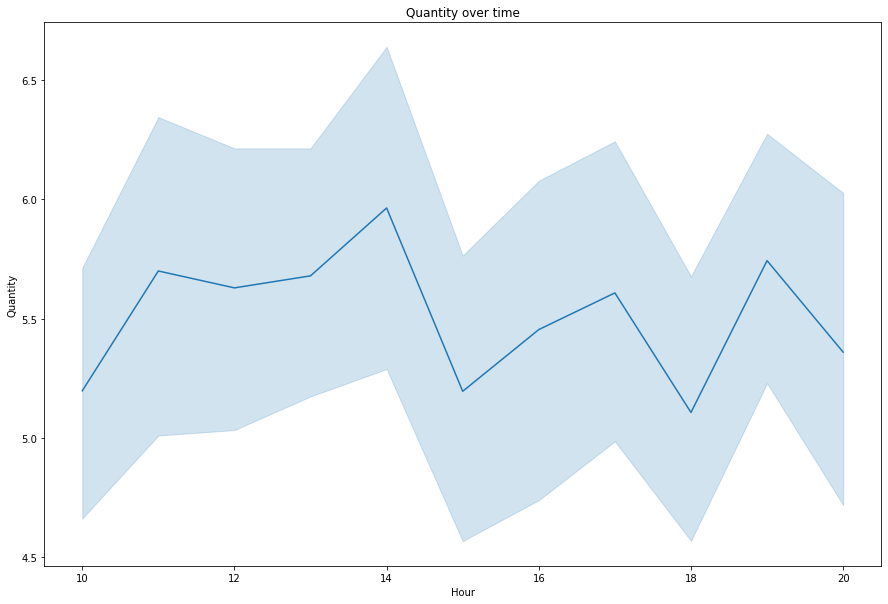

In [40]:
plt.figure(figsize=(15,10))
plt.title("Quantity over time")
sns.lineplot(data=df, x="Hour", y="Quantity")
plt.plot()